In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Signup=pd.read_csv("takehome_users.csv", encoding='latin-1')

In [29]:
Signup.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [4]:
usage=pd.read_csv("takehome_user_engagement.csv",encoding='latin-1')
years=pd.to_datetime(usage["time_stamp"]).dt.year
Week=pd.to_datetime(usage["time_stamp"]).dt.week
day=pd.to_datetime(usage["time_stamp"]).dt.day
usage['years'] = years
usage['week'] = Week

usage.head()

/var/folders/mz/69ry24wj6p17r45gmjms3lqr0000gn/T/ipykernel_41779/3618535532.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Week=pd.to_datetime(usage["time_stamp"]).dt.week


,time_stamp,user_id,visited,years,week
0,2014-04-22 03:53:30,1,1,2014,17
1,2013-11-15 03:45:04,2,1,2013,46
2,2013-11-29 03:45:04,2,1,2013,48
3,2013-12-09 03:45:04,2,1,2013,50
4,2013-12-25 03:45:04,2,1,2013,52
...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013,36
207913,2013-01-15 18:28:37,11997,1,2013,3
207914,2014-04-27 12:45:16,11998,1,2014,17
207915,2012-06-02 11:55:59,11999,1,2012,22


In [5]:
D=usage.user_id.unique()
L=D.tolist()

In [6]:
L=[]
Visits=usage["user_id"].value_counts()
VCDF=pd.DataFrame(Visits)
Col=["count"]
VCDF.columns=Col
Countsl=VCDF['count']

USERS=Visits.index.array
Countslist=Countsl.tolist()
for i in Countslist:
    L.append(int(i))


In [7]:
#Getting Data of users and the number of times used
dict={'User_id':USERS,'Counts':L}
CUSAGE=pd.DataFrame(dict)
CUSAGE.head()

,User_id,Counts
0,3623,606
1,906,600
2,1811,593
3,7590,590
4,8068,585
...,...,...
8818,4699,1
8819,4698,1
8820,4697,1
8821,4696,1


In [8]:
#Getting all the users who used the app 3 times or more
ReqCUSAGE=CUSAGE[CUSAGE['Counts']>=3]

In [9]:
M=ReqCUSAGE["User_id"]
V=[]
for i in M:
    V.append(i)
V.sort()
len(V)

User_list=V

In [30]:
#for i in V:
    #print(usage.loc[usage['user_id'] == i])


IndentationError: expected an indented block (1467483318.py, line 2)

In [11]:
usage['years'].unique()
Yearslist=[2012,2013,2014]

weekslist=usage['week'].unique().tolist()
weekslist.sort()
weekslist
cou_nt=0
userslisttotal=usage['user_id'].tolist()
yearslisttotal=usage['years'].tolist()
weeklisttotal=usage['week'].tolist()

In [31]:
usage.groupby(['user_id','week']).sum().head()

visited  years
user_id week                
1       17          1   2014
2       1           1   2013
        2           1   2014
        6           3   6042
        7           2   4028

In [32]:
USAGENEWDF=usage.groupby(['user_id','week']).sum().reset_index()
USAGENEWDF.head()

,user_id,week,visited,years
0,1,17,1,2014
1,2,1,1,2013
2,2,2,1,2014
3,2,6,3,6042
4,2,7,2,4028


In [14]:
USERS=[]
User=[]
for i in User_list:
    USERS.append((USAGENEWDF[(USAGENEWDF['user_id']==i)&(USAGENEWDF['visited']>=3)])["user_id"].unique())
for i in USERS:
    User.append((i.tolist()))
User
Users=[]
for i in User:
    for j in i:
        Users.append(i)

In [35]:
#getting list of Adopted users:
import itertools
AdoptedUsers = list(itertools.chain(*Users))
AdoptedUsers[:50]

[2,
 10,
 20,
 33,
 42,
 43,
 53,
 63,
 69,
 74,
 80,
 81,
 82,
 87,
 133,
 135,
 141,
 146,
 153,
 160,
 165,
 168,
 174,
 185,
 188,
 197,
 200,
 202,
 203,
 209,
 214,
 230,
 245,
 247,
 263,
 265,
 275,
 280,
 283,
 297,
 298,
 305,
 310,
 311,
 322,
 341,
 351,
 363,
 370,
 383]

In [36]:
#users who have used it more than 3 times in one week
usage.loc[usage["user_id"].isin(AdoptedUsers)].head()


,time_stamp,user_id,visited,years,week
1,2013-11-15 03:45:04,2,1,2013,46
2,2013-11-29 03:45:04,2,1,2013,48
3,2013-12-09 03:45:04,2,1,2013,50
4,2013-12-25 03:45:04,2,1,2013,52
5,2013-12-31 03:45:04,2,1,2013,1


In [37]:
Signup.head() #original dataset
    

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [18]:
SIGNUPUSERSWHOUSED=pd.DataFrame(Signup.loc[Signup["object_id"].isin(AdoptedUsers)])

In [38]:
SIGNUPUSERSWHOUSED.head()  #data of users who adopted

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0
19,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN
32,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0
41,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN


In [42]:
Z=[]
M={}
for i in range(1,12001):
    if i in AdoptedUsers:
        Z.append(1)
    else:
        Z.append(0)
  
M={"Adopted":Z}
print(Z[:100])

[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [21]:
Y=pd.DataFrame(M)
Y.shape

(12000, 1)

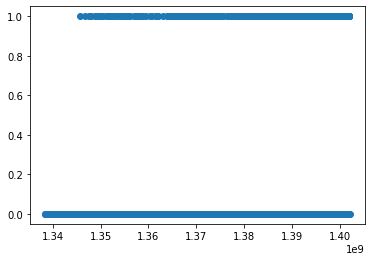

In [22]:
#prediction the higher the last creation time over 1.345*1e9,the more more probability the user will join again
x=Signup['last_session_creation_time']
X=np.array(x).reshape(-1,1)
plt.scatter(X,Y)

In [24]:
Signup["Adopted"]=Z

<AxesSubplot:ylabel='Adopted'>

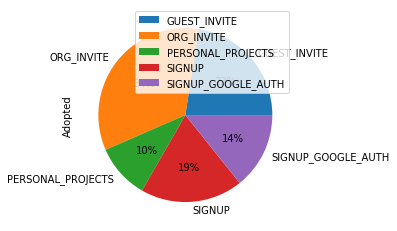

In [25]:
Signup.groupby(['creation_source']).sum().plot(kind='pie', y='Adopted',autopct='%1.0f%%')

<AxesSubplot:ylabel='Adopted'>

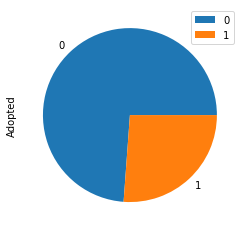

In [26]:
Signup.groupby(['opted_in_to_mailing_list']).sum().plot(kind='pie', y='Adopted')

<AxesSubplot:ylabel='Adopted'>

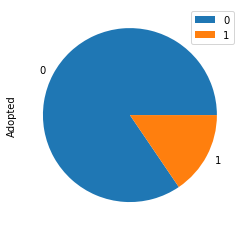

In [27]:
Signup.groupby(['enabled_for_marketing_drip']).sum().plot(kind='pie', y='Adopted')

In [28]:
len(AdoptedUsers)

1445